In [1]:
import numpy as np 
import pandas as pd 
import os


In [2]:
df = pd.read_csv("Analyser dataset.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  float64
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  float64
 4   average_montly_hours   14999 non-null  float64
 5   time_spend_company     14999 non-null  float64
 6   Work_accident          14999 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  company                12783 non-null  object 
dtypes: float64(8), object(3)
memory usage: 1.3+ MB


In [3]:
df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,company
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low,Reliance
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,accounting,medium,Tata
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,marketing,high,Adani
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,product_mng,low,infosys
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,hr,low,wipro


In [4]:
df.pop("Emp ID")

0            1.0
1            2.0
2            3.0
3            4.0
4            5.0
          ...   
15782    14995.0
15783    14996.0
15784    14997.0
15785    14998.0
15786    14999.0
Name: Emp ID, Length: 15787, dtype: float64

In [5]:
df.pop("Work_accident")

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
15782    0.0
15783    0.0
15784    0.0
15785    0.0
15786    0.0
Name: Work_accident, Length: 15787, dtype: float64

In [6]:
df.pop("time_spend_company")

0        3.0
1        6.0
2        4.0
3        5.0
4        3.0
        ... 
15782    3.0
15783    3.0
15784    3.0
15785    4.0
15786    3.0
Name: time_spend_company, Length: 15787, dtype: float64

In [7]:
df.pop("last_evaluation")

0        0.53
1        0.86
2        0.88
3        0.87
4        0.52
         ... 
15782    0.57
15783    0.48
15784    0.53
15785    0.96
15786    0.52
Name: last_evaluation, Length: 15787, dtype: float64

In [8]:
df.head()

,satisfaction_level,number_project,average_montly_hours,promotion_last_5years,dept,salary,company
0,0.38,2.0,157.0,0.0,sales,low,Reliance
1,0.80,5.0,262.0,0.0,accounting,medium,Tata
2,0.11,7.0,272.0,0.0,marketing,high,Adani
3,0.72,5.0,223.0,0.0,product_mng,low,infosys
4,0.37,2.0,159.0,0.0,hr,low,wipro


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
dict_label = dict()
for col in df.columns:
    if df[col].dtype == np.dtype("object"):
        dict_label[col] = LabelEncoder()
        df[col] = dict_label[col].fit_transform(df[col])
    else:
        # lets impute the numerica values using the mean
        df[col] = df[col].fillna(df[col].mean())

In [11]:
df.head(10)

,satisfaction_level,number_project,average_montly_hours,promotion_last_5years,dept,salary,company
0,0.38,2.0,157.0,0.0,7,1,2
1,0.80,5.0,262.0,0.0,2,2,3
2,0.11,7.0,272.0,0.0,5,0,0
3,0.72,5.0,223.0,0.0,6,1,4
4,0.37,2.0,159.0,0.0,3,1,5
5,0.41,2.0,153.0,0.0,8,1,2
6,0.10,6.0,247.0,0.0,9,1,2
7,0.92,5.0,259.0,0.0,4,1,2
8,0.89,5.0,224.0,0.0,0,1,2
9,0.42,2.0,142.0,0.0,1,1,2


In [12]:
from sklearn.tree import DecisionTreeRegressor

In [13]:
y = df.pop("satisfaction_level")
X = df

In [14]:
dtr = DecisionTreeRegressor()
dtr.fit(X,y)
importance = {str(col):feat_imp for col,feat_imp in zip(df.columns,dtr.feature_importances_)}
print(importance)

{'number_project': 0.3786431752507523, 'average_montly_hours': 0.33682019974943306, 'promotion_last_5years': 0.007461546624452403, 'dept': 0.1313794935388311, 'salary': 0.05720515444463856, 'company': 0.08849043039189262}


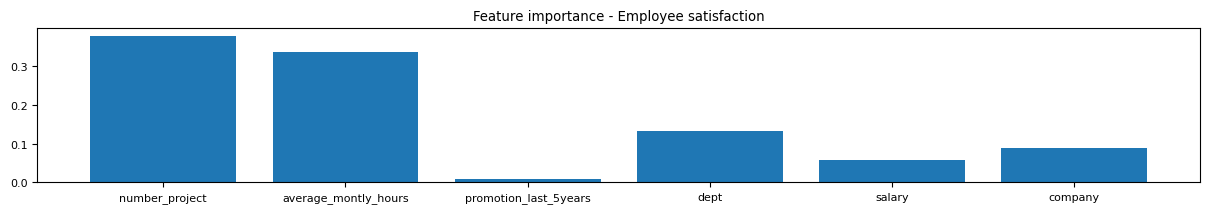

In [15]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 8
plt.rcParams['figure.figsize'] = [15, 2]
plt.bar(list(importance.keys()),list(importance.values()))
plt.title("Feature importance - Employee satisfaction")
plt.show()

In [16]:
names = np.array(list(importance.keys()))
feature_importance = list(importance.values())
sorted_fi = np.argsort(feature_importance)[::-1]
selected_features = names[sorted_fi]
df_sf =df[selected_features]
X = df_sf

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = .2)

In [19]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [20]:
early_stop = xgb.callback.EarlyStopping(
rounds=8, metric_name='r2_score', save_best=True,maximize = True
)

print("training...")

rf = xgb.XGBRegressor(n_estimators = 10000,callbacks=[early_stop], learning_rate = .01, eval_metric = r2_score)

rf.fit(X_train,y_train,eval_set=[(X_test, y_test)], verbose = False)

training...


XGBRegressor(base_score=None, booster=None,
             callbacks=[<xgboost.callback.EarlyStopping object at 0x00000208DBC22590>],
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False,
             eval_metric=<function r2_score at 0x00000208D91B89A0>,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=10000,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [21]:
test_pred = rf.predict(X_test)
print(mean_squared_error(y_test,test_pred))
print(mean_absolute_percentage_error(y_test,test_pred))
print(r2_score(y_test,test_pred))
print(mean_absolute_error(y_test,test_pred))

0.034521589396184695
0.33202327374653806
0.387673313340409
0.1368903953302043


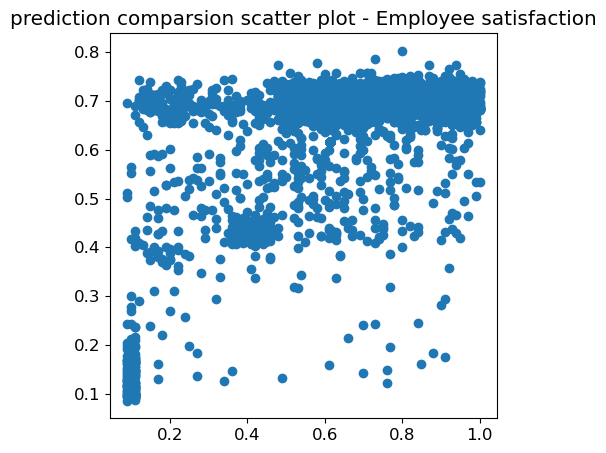

In [22]:
plt.rcParams["font.size"] = 12
plt.rcParams['figure.figsize'] = [5, 5]
plt.scatter(y_test,test_pred)
plt.title("prediction comparsion scatter plot - Employee satisfaction")
plt.show()

In [23]:
train_pred = rf.predict(X_train)
print(mean_squared_error(y_train,train_pred))
print(mean_absolute_percentage_error(y_train,train_pred))
print(r2_score(y_train,train_pred))
print(mean_absolute_error(y_train,train_pred))

0.03127758086070914
0.3199973478430309
0.4725358327506849
0.13042314460453547


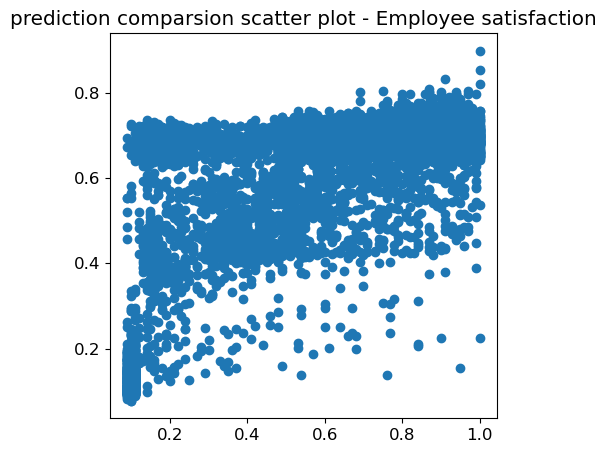

In [24]:
plt.rcParams["font.size"] = 12
plt.rcParams['figure.figsize'] = [5, 5]
plt.scatter(y_train,train_pred)
plt.title("prediction comparsion scatter plot - Employee satisfaction")

plt.show()

In [25]:
import pickle

In [26]:
with open('classifier.pkl','wb') as file:
  pickle.dump(dtr, file)

In [27]:
with open('classifier.pkl','rb') as file:
  clf = pickle.load(file)

In [28]:
print(f"Shape of input data: {X.shape}")
print(f"Number of features expected by the model: {dtr.n_features_in_}")


Shape of input data: (15787, 6)
Number of features expected by the model: 6


In [29]:
feature_names = dtr.feature_names_in_
print(f"Feature names: {feature_names}")

Feature names: ['number_project' 'average_montly_hours' 'promotion_last_5years' 'dept'
 'salary' 'company']


In [30]:

feature_values = []
feature_names = [ 'number_project', 'average_monthly_hours', 'promotion_last_5years', 'dept', 'salary', 'company'] 
for feature_name in feature_names:
    value = (input(f"Enter value for {feature_name}: "))
    feature_values.append(value)

input_data = [feature_values]

In [31]:
prediction = clf.predict(input_data)

if prediction <= 0.5:
    print("Satisfaction of employee is low:", prediction)
else:
    print("Satisfaction of employee is okay:", prediction)

Satisfaction of employee is okay: [0.98]


c:\Users\chand\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
